In [19]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [3]:
cwd = "c:\\Users\\m1865\\Desktop\\DISC"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed"

In [4]:
pd_Variogram = pd.read_csv(cwd + "\\Result - Variogram.csv")
pd_Variogram.head()

,Site,Distance,Range,Sill,Nugget,STD,CV
0,ATGE,30m,20.000000,99.392275,3.570080e+01,10.292980,0.256794
1,ATGE,100m,70.000000,267.887789,4.884311e-14,15.866641,0.478179
2,ATGE,300m,104.664413,449.836840,6.333086e+01,20.748732,0.428943
3,ATGE,900m,345.097180,438.814722,1.064037e+02,20.035755,0.502820
4,ATGE,1200m,327.228777,419.066655,8.059260e+01,19.909969,0.527853


In [5]:
pd_Roman = pd.read_csv(cwd + "\\Result - Roman.csv")
pd_Roman.head()

,Site,Internal Distance,External Distance,Rcv,Rse,Rst,Rsv,RAW Score,ST Score
0,ATGE,30m,100m,0.862114,0.784802,0.990000,8.646682,0.579970,0.233405
1,ATGE,30m,300m,0.670379,0.788821,0.716754,11.393105,0.745846,0.198063
2,ATGE,100m,300m,-0.102966,0.923035,-0.137310,0.284701,4.855959,0.910724
3,ATGE,300m,900m,0.172231,0.954540,-0.136330,1.906935,2.903070,0.590654
4,ATGE,300m,1200m,0.230590,0.954330,-0.068328,1.938959,2.168347,0.588135


[Text(0, 0, '33'),
 Text(0, 0, '149'),
 Text(0, 0, '108'),
 Text(0, 0, '45'),
 Text(0, 0, '25'),
 Text(0, 0, '18'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '10'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '5'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '0'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

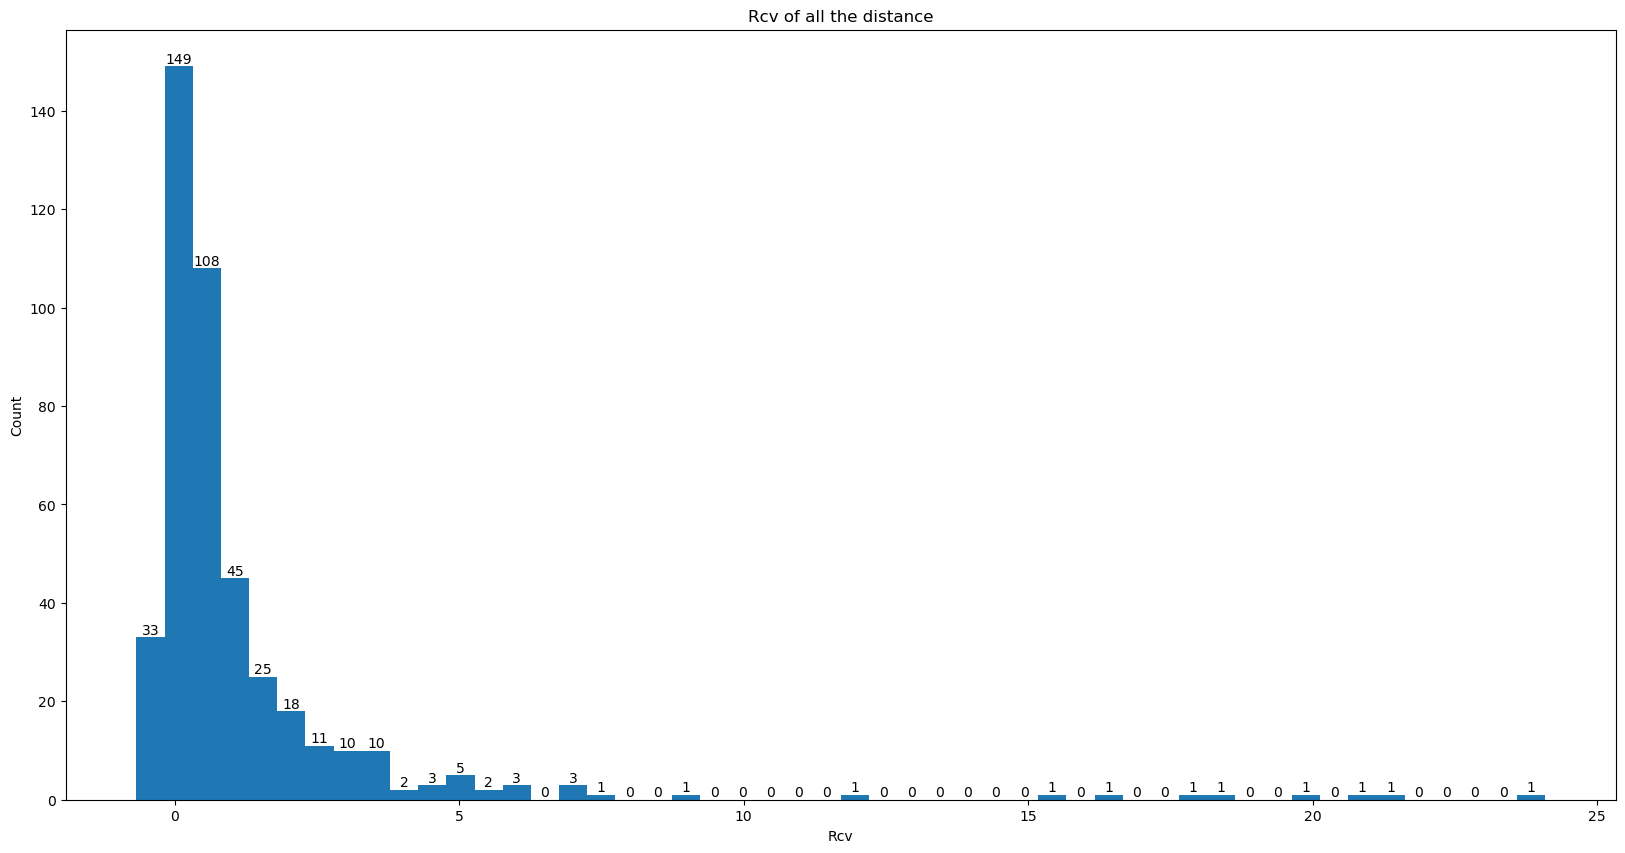

In [12]:
plt.figure(figsize = (20,10))
plt.title("Rcv of all the distance")
counts, edges, bars = plt.hist(pd_Roman["Rcv"], bins = 50)
plt.xlabel("Rcv")
plt.ylabel("Count")
plt.bar_label(bars)

[Text(0, 0, '14'),
 Text(0, 0, '9'),
 Text(0, 0, '16'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '1'),
 Text(0, 0, '5'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

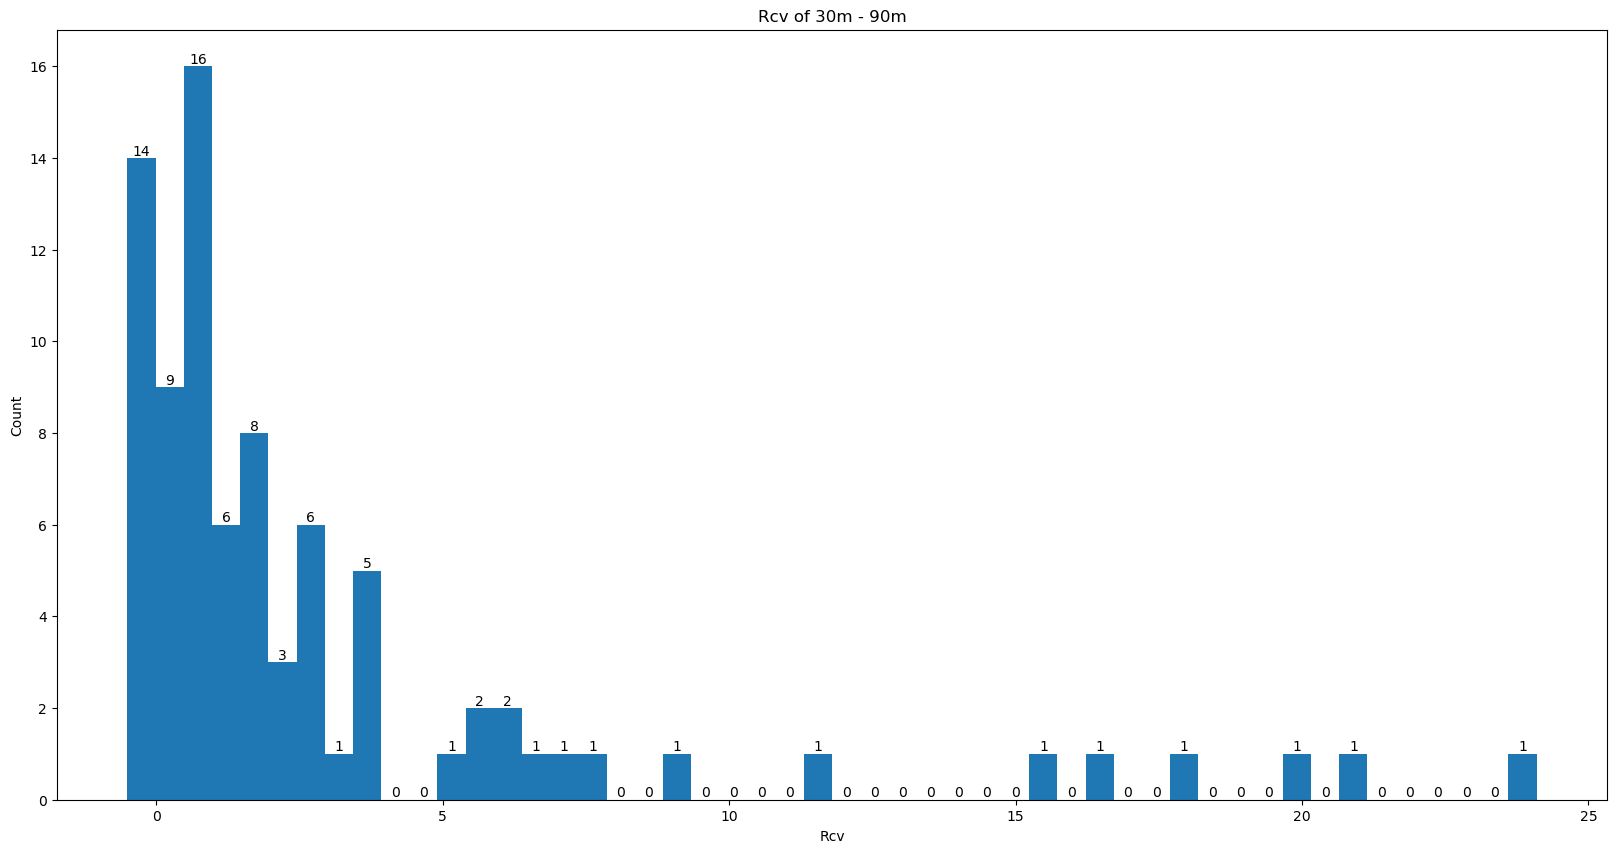

In [16]:
plt.figure(figsize = (20,10))
plt.title("Rcv of 30m - 300m")
counts, edges, bars = plt.hist(pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == '30m') & (pd_Roman['External Distance'] == '300m'))]['Rcv'], bins = 50)
plt.xlabel("Rcv")
plt.ylabel("Count")
plt.bar_label(bars)

[Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '8'),
 Text(0, 0, '11'),
 Text(0, 0, '3'),
 Text(0, 0, '9'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

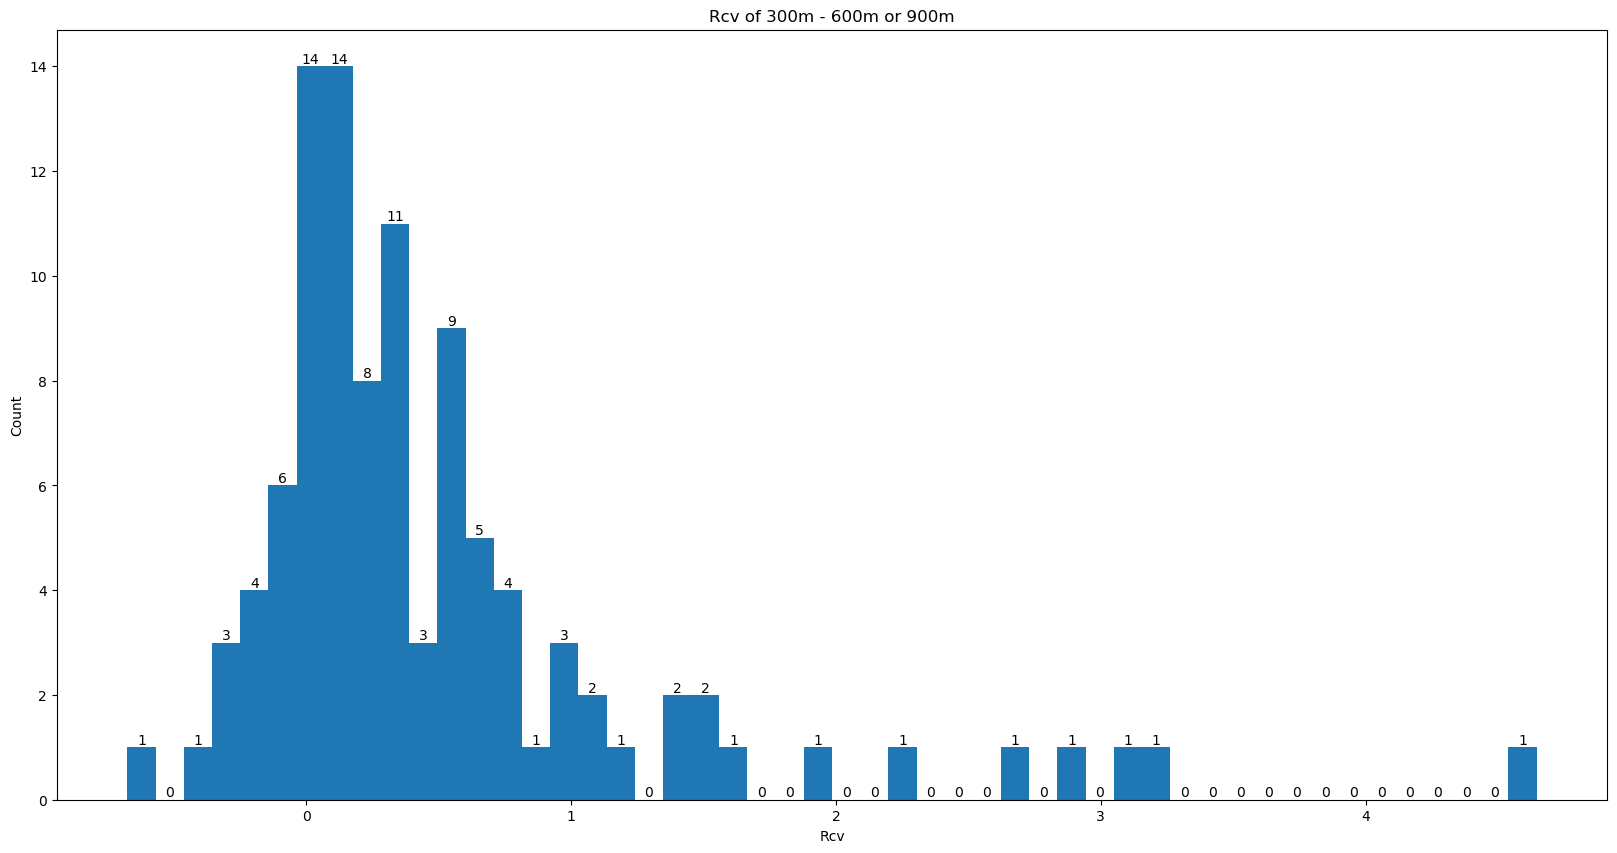

In [18]:
plt.figure(figsize = (20,10))
plt.title("Rcv of 300m - 600m or 900m")
counts, edges, bars = plt.hist(pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == '300m') & (pd_Roman['External Distance'].isin(['900m','600m'])))]['Rcv'], bins = 50)
plt.xlabel("Rcv")
plt.ylabel("Count")
plt.bar_label(bars)

[Text(0, 0, '374'),
 Text(0, 0, '31'),
 Text(0, 0, '11'),
 Text(0, 0, '7'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

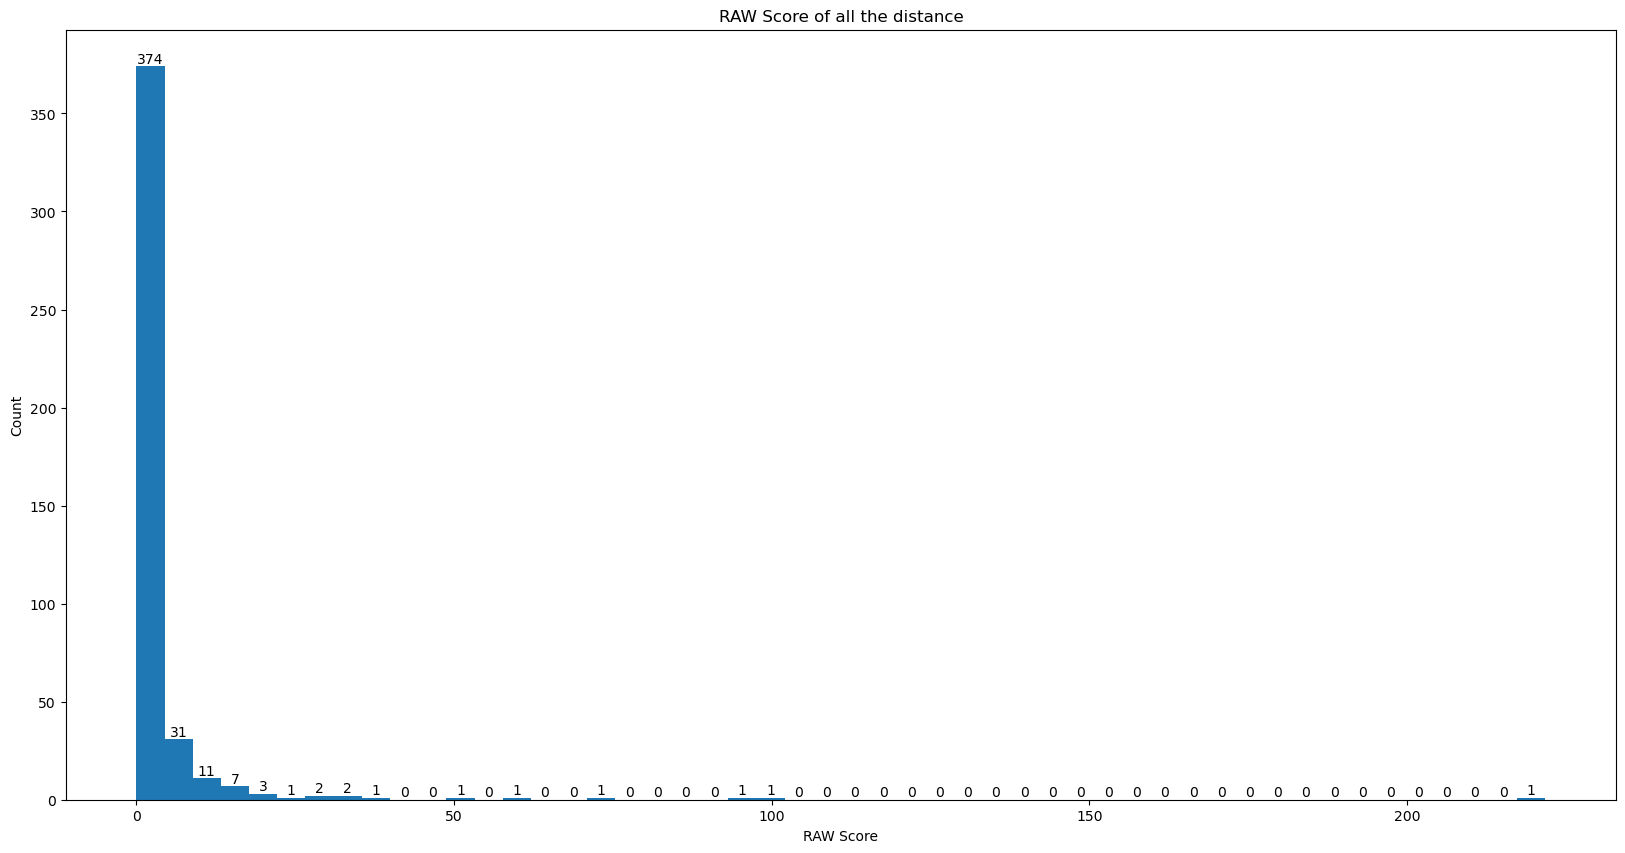

In [21]:
plt.figure(figsize = (20,10))
plt.title("RAW Score of all the distance")
counts, edges, bars = plt.hist(pd_Roman["RAW Score"], bins = 50)
plt.xlabel("RAW Score")
plt.ylabel("Count")
plt.bar_label(bars)

[Text(0, 0, '39'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '0'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

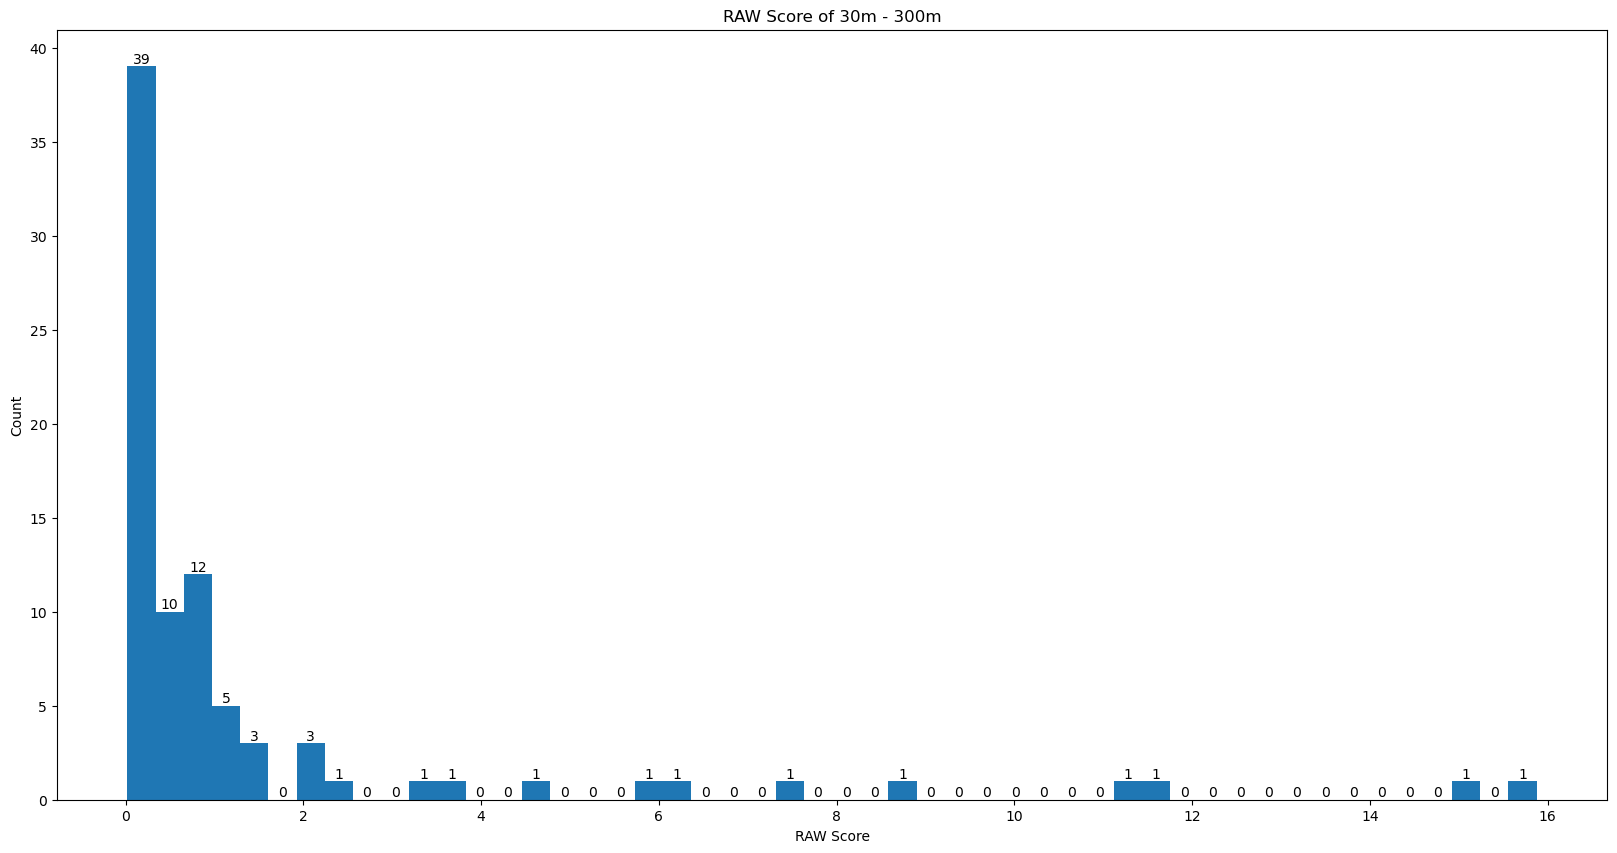

In [22]:
plt.figure(figsize = (20,10))
plt.title("RAW Score of 30m - 300m")
counts, edges, bars = plt.hist(pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == '30m') & (pd_Roman['External Distance'] == '300m'))]['RAW Score'], bins = 50)
plt.xlabel("RAW Score")
plt.ylabel("Count")
plt.bar_label(bars)

[Text(0, 0, '58'),
 Text(0, 0, '20'),
 Text(0, 0, '9'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

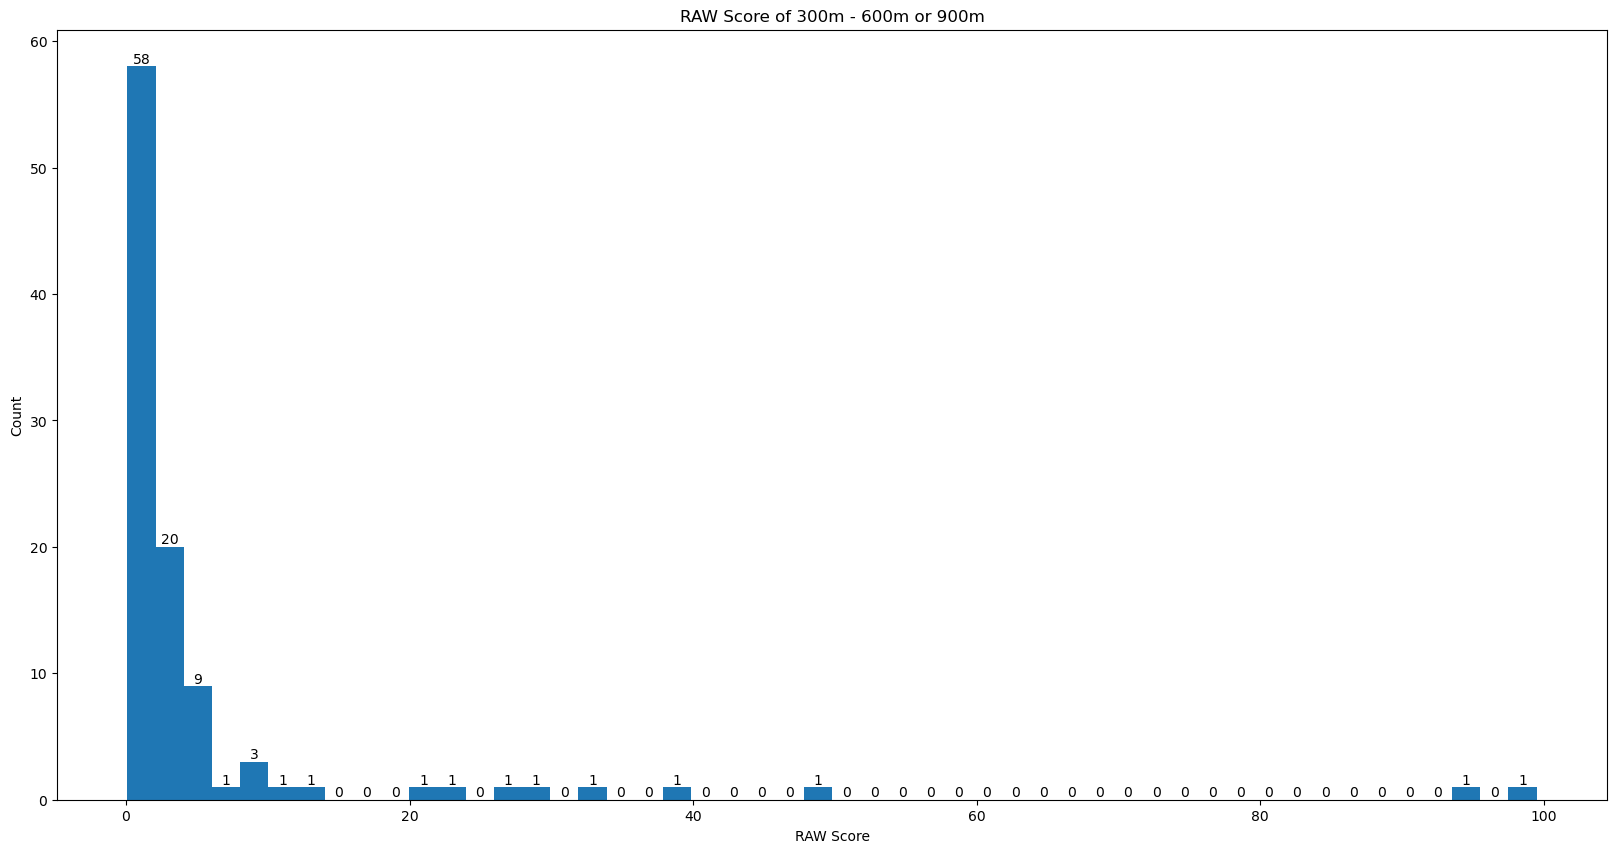

In [23]:
plt.figure(figsize = (20,10))
plt.title("RAW Score of 300m - 600m or 900m")
counts, edges, bars = plt.hist(pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == '300m') & (pd_Roman['External Distance'].isin(['900m','600m'])))]['RAW Score'], bins = 50)
plt.xlabel("RAW Score")
plt.ylabel("Count")
plt.bar_label(bars)

[Text(0, 0, '15'),
 Text(0, 0, '11'),
 Text(0, 0, '7'),
 Text(0, 0, '7'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '8'),
 Text(0, 0, '12'),
 Text(0, 0, '6'),
 Text(0, 0, '11'),
 Text(0, 0, '9'),
 Text(0, 0, '9'),
 Text(0, 0, '5'),
 Text(0, 0, '9'),
 Text(0, 0, '13'),
 Text(0, 0, '9'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '8'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '9'),
 Text(0, 0, '14'),
 Text(0, 0, '20'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '12'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '11'),
 Text(0, 0, '8'),
 Text(0, 0, '5'),
 Text(0, 0, '10'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '5'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2')]

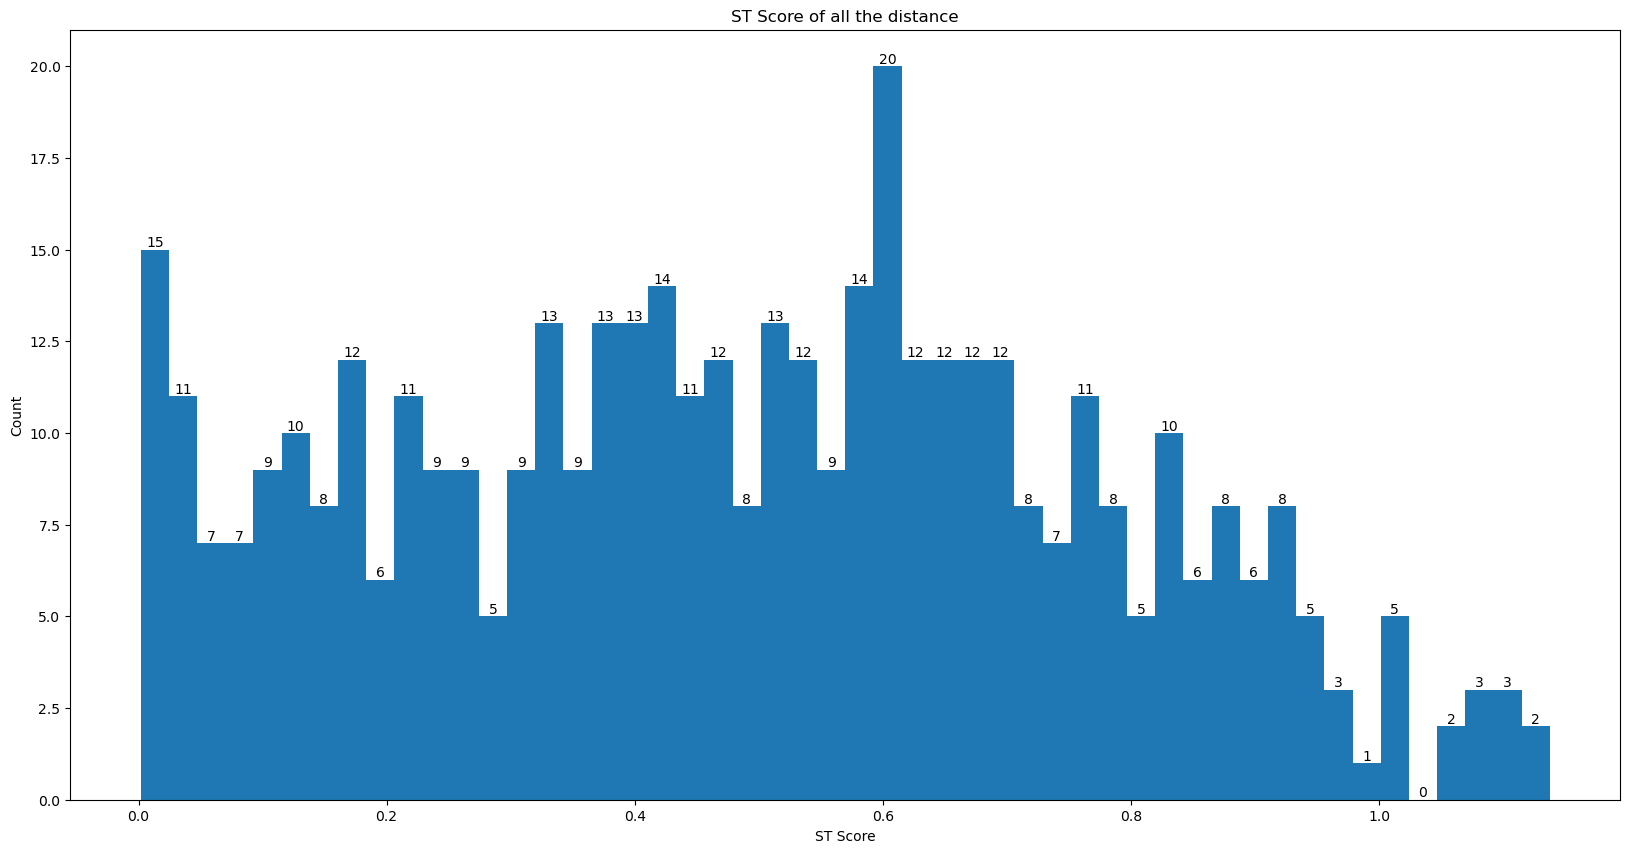

In [24]:
plt.figure(figsize = (20,10))
plt.title("ST Score of all the distance")
counts, edges, bars = plt.hist(pd_Roman["ST Score"], bins = 50)
plt.xlabel("ST Score")
plt.ylabel("Count")
plt.bar_label(bars)

[Text(0, 0, '8'),
 Text(0, 0, '5'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '5'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '2')]

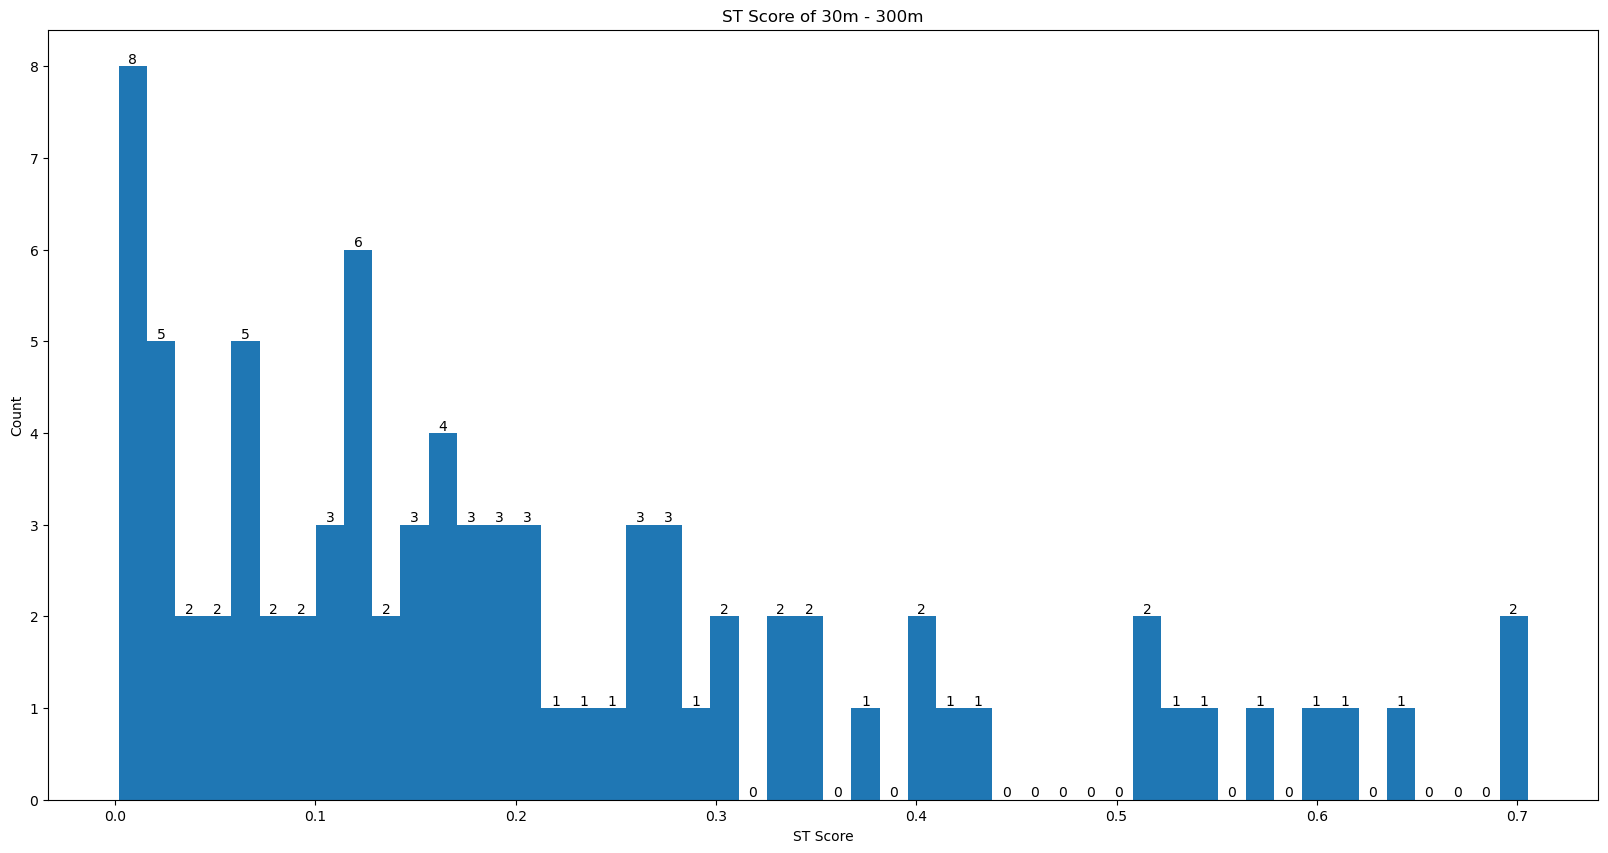

In [25]:
plt.figure(figsize = (20,10))
plt.title("ST Score of 30m - 300m")
counts, edges, bars = plt.hist(pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == '30m') & (pd_Roman['External Distance'] == '300m'))]['ST Score'], bins = 50)
plt.xlabel("ST Score")
plt.ylabel("Count")
plt.bar_label(bars)

[Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '6'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '5'),
 Text(0, 0, '2'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '0'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '7'),
 Text(0, 0, '0'),
 Text(0, 0, '4'),
 Text(0, 0, '0'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '3')]

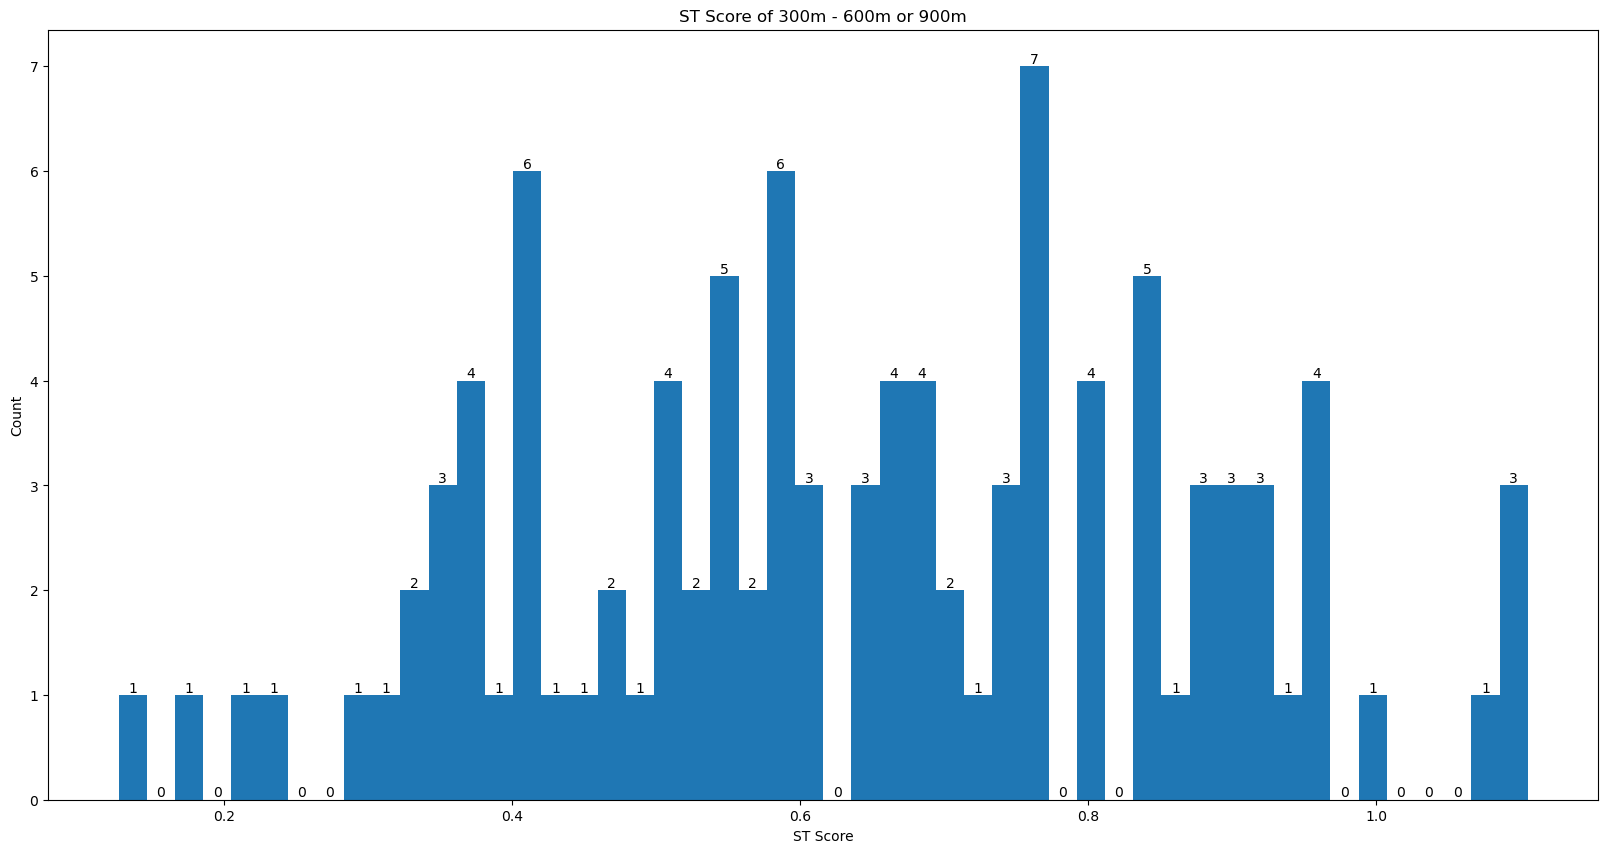

In [26]:
plt.figure(figsize = (20,10))
plt.title("ST Score of 300m - 600m or 900m")
counts, edges, bars = plt.hist(pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == '300m') & (pd_Roman['External Distance'].isin(['900m','600m'])))]['ST Score'], bins = 50)
plt.xlabel("ST Score")
plt.ylabel("Count")
plt.bar_label(bars)

In [27]:
pd_Roman.loc[np.where((pd_Roman['Internal Distance'] == '300m') & (pd_Roman['External Distance'].isin(['900m','600m'])))]['ST Score']

3      0.590654
8      0.207254
10     0.454011
14     0.463634
19     0.638616
         ...   
424    0.230559
426    0.361311
430    0.537878
432    0.810148
436    0.379367
Name: ST Score, Length: 102, dtype: float64